In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12.8, 9.6]

df = pd.read_csv('Letters.csv', index_col=0)
df

,Stem,Tail,Shoulder,up Down Sym,Right Left,Cross Bar,arm,Bowl
A,0,0,0,0,1,1,0,0
B,0,0,1,1,1,1,0,1
C,0,0,0,1,0,0,0,0
D,0,0,0,1,0,0,0,1
E,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
5,1,0,1,0,0,0,0,0
6,1,0,1,0,0,0,0,1
7,1,0,0,0,0,0,1,0
8,0,0,0,1,0,0,1,1


Distribution across all 256 binary strings:

In [2]:
import itertools

def generate_permutations(bits):
    return list("".join(p) for p in itertools.product("01", repeat=bits))

permutations = generate_permutations(8)
counts = { bitstring:0 for bitstring in permutations }

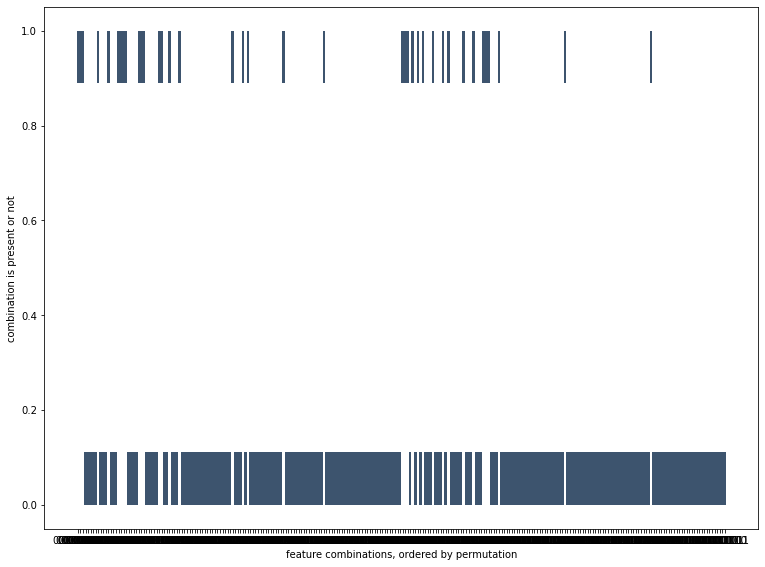

In [3]:
def combine_row_columns(df):
    return ["".join(row.astype(str)) for _, row in df.iterrows()]

combined_rows = combine_row_columns(df)

for row in combined_rows:
    counts[row] = 1
    
ax = sns.histplot(x=counts.keys(), y=counts.values())
ax.set(xlabel='feature combinations, ordered by permutation', ylabel='combination is present or not')
plt.show()

Binary distance between each letter / number

In [4]:
def binary_distance(a, b):
    return np.sum(a != b)

def calculate_distance_matrix(df):
    distance_matrix = np.zeros((len(df), len(df)))
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            distance = binary_distance(df.iloc[i], df.iloc[j])
            distance_matrix[i, j] = distance
            distance_matrix[j, i] = distance
    return distance_matrix

distance_matrix = calculate_distance_matrix(df)

/Users/suibhneofoighil/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


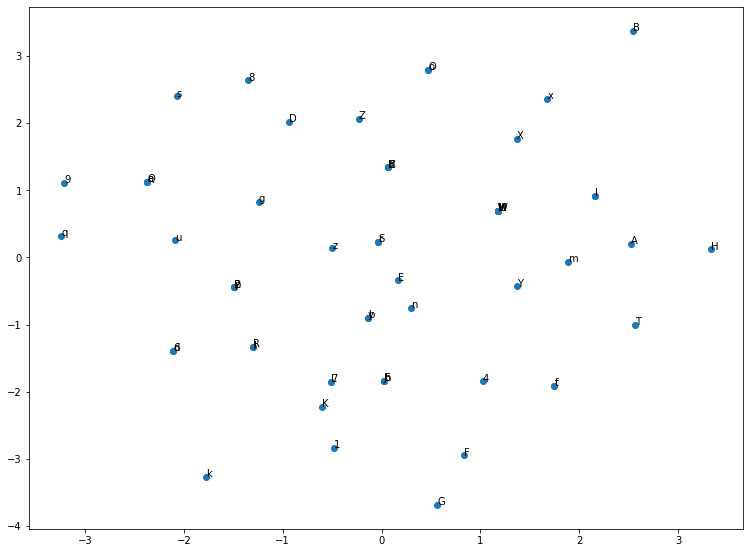

In [5]:
from sklearn.manifold import MDS

def visualize_distance_matrix(distance_matrix, labels=None):
    mds = MDS(n_components=2, dissimilarity='precomputed')
    mds_coordinates = mds.fit_transform(distance_matrix)
    x = mds_coordinates[:, 0]
    y = mds_coordinates[:, 1]
    plt.scatter(x, y)
    if labels is not None:
        for i, label in enumerate(labels):
            plt.annotate(label, (x[i], y[i]))
    plt.show()

labels = df.index

visualize_distance_matrix(distance_matrix, labels)

In [6]:
combinations = np.where(distance_matrix == 0)
combinations = list(zip(*combinations))
combinations = [ (labels[row], labels[col]) for row, col in combinations if row != col]

def remove_reverse_pairs(pairs):
    deduped_pairs = []
    for pair in pairs:
        if (pair[1], pair[0]) not in deduped_pairs:
            deduped_pairs.append(pair)
    return deduped_pairs

combinations = remove_reverse_pairs(combinations)

print('zero distance combinations:', combinations)

zero distance combinations: [('C', 'N'), ('C', 'c'), ('C', '3'), ('I', 'l'), ('J', 'h'), ('J', '5'), ('L', '7'), ('M', 'U'), ('M', 'V'), ('M', 'W'), ('M', 'i'), ('M', 'v'), ('M', 'w'), ('N', 'c'), ('N', '3'), ('O', 'o'), ('P', 'p'), ('P', '2'), ('Q', 'a'), ('Q', 'e'), ('R', 'j'), ('S', 'r'), ('U', 'V'), ('U', 'W'), ('U', 'i'), ('U', 'v'), ('U', 'w'), ('V', 'W'), ('V', 'i'), ('V', 'v'), ('V', 'w'), ('W', 'i'), ('W', 'v'), ('W', 'w'), ('a', 'e'), ('b', 'y'), ('c', '3'), ('d', '6'), ('f', 't'), ('h', '5'), ('i', 'v'), ('i', 'w'), ('p', '2'), ('v', 'w')]


Find minimal distance for each letter / number to neighbor

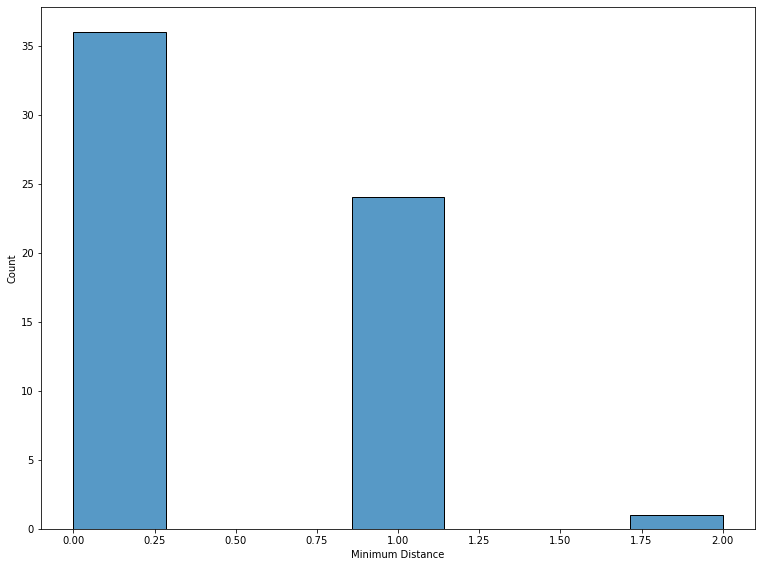

In [7]:
np.fill_diagonal(distance_matrix, np.inf)
minimum_distances = np.min(distance_matrix, axis=0)
ax = sns.histplot(minimum_distances)
ax.set(xlabel='Minimum Distance')
plt.show()

Find distances for each combination

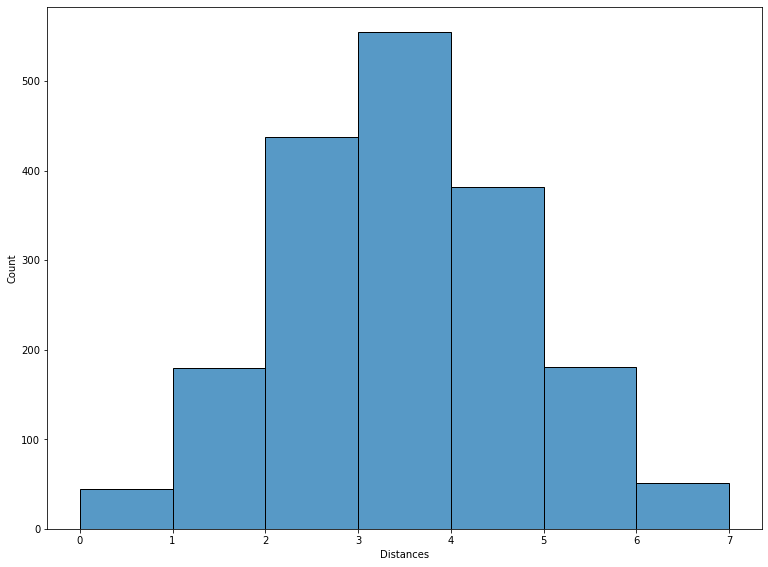

In [8]:
triangular_indices = np.triu_indices(distance_matrix.shape[0], k=1)
flat_upper_triangular = distance_matrix[triangular_indices]
ax = sns.histplot(flat_upper_triangular, bins=range(int(np.min(flat_upper_triangular)), int(np.max(flat_upper_triangular) + 1)))
ax.set(xlabel='Distances')
plt.show()